In [2]:
import pandas as pd
import osmnx as ox
from osmnx.distance import nearest_nodes

In [2]:
df = pd.read_csv("../ValenbisiData/Valenbisi.csv", delimiter=";")
df = df.groupby("Id_station").agg({"Latitude": "first", "Longitude": "first"})
df

Latitude  Longitude
Id_station                      
1           39.480042  -0.382929
2           39.479889  -0.379748
3           39.476835  -0.380288
4           39.476747  -0.375342
5           39.476895  -0.371140
...               ...        ...
272         39.480623  -0.332190
273         39.450305  -0.333272
274         39.448070  -0.333188
275         39.452305  -0.335065
276         39.461975  -0.323765

[276 rows x 2 columns]

In [3]:
north, south = max(df["Latitude"]) + 0.001, min(df["Latitude"]) - 0.01
east, west = max(df["Longitude"]) + 0.001, min(df["Longitude"]) - 0.001
print(north, south, east, west)

39.502445442980175 39.42982822413676 -0.3224012136184579 -0.4272635367844481


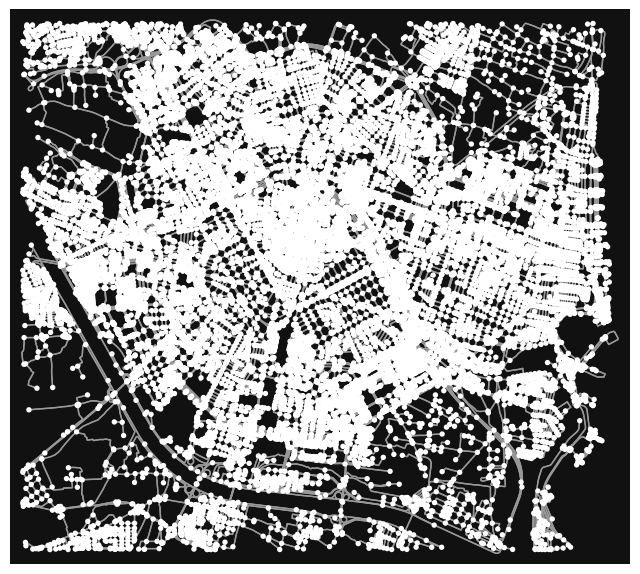

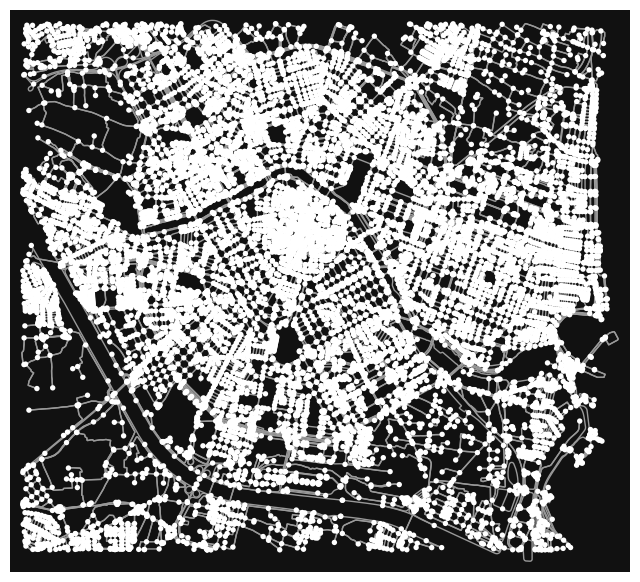

In [4]:
G = {"Walking": ox.graph.graph_from_bbox(north, south, east, west, network_type='walk'),
     "Cycling": ox.graph.graph_from_bbox(north, south, east, west, network_type='bike')}
for g in G.values():
    ox.plot_graph(g)

In [12]:
def distance2Points(g, lat1, lon1, lat2, lon2):
    def CalculateRoute(n1, n2):
        return ox.shortest_path(g, n1, n2, weight = "length")
    
    def SumEdges(r):
        return int(sum(ox.utils_graph.get_route_edge_attributes(g, r, attribute = "length")))
    
    n1 = nearest_nodes(g, lon1, lat1)
    n2 = nearest_nodes(g, lon2, lat2)
        
    try:
        print("A")
        return SumEdges(CalculateRoute(n1, n2))
    except:
        try:
            print("B")
            return SumEdges(CalculateRoute(n2, n1))
        except:
            print("C")
            return distance2Points(G["Walking"], lat1, lon1, lat2, lon2)

In [13]:
iS = [1, 111, 185, 276]

N = len(df)
distances = {"Walking": pd.DataFrame(0, index = range(1, N+1), columns = range(1, N+1)),
             "Cycling": pd.DataFrame(0, index = range(1, N+1), columns = range(1, N+1))}

for id1, (lat1, lon1) in df.iterrows():
    for id2, (lat2, lon2) in df.iterrows():
        if id2 > id1 and id1 in iS and id2 in iS:
            for mode, dfDist in distances.items():
                dist = distance2Points(G[mode], lat1, lon1, lat2, lon2)
                print(id1, id2, dist)
                dfDist.loc[id1, id2] = dist
                dfDist.loc[id2, id1] = dist

A
1 111 4525
A
B
1 111 4760
A
1 185 3884
A
B
1 185 4114
A
1 276 6091
A
1 276 6069
A
111 185 5030
A
B
C
A
111 185 5030
A
111 276 3042
A
111 276 3103
A
185 276 4773
A
185 276 4796


In [7]:
for mode, dfDist in distances.items():
    dfDist.to_csv(f"../DistancesData/Distances{mode}.csv", sep = ";", index_label = "Index")

In [8]:
distancesWalking = pd.read_csv("../DistancesData/DistancesWalking.csv", sep = ";", index_col = "Index", dtype = {"Index":str})
distancesWalking

1     2     3     4     5     6     7     8     9    10  ...   267  \
Index                                                              ...         
1         0   305   563   935  1193   831   825  1224  1508  1151  ...  2938   
2       305     0   360   630   888  1013   617   919  1202  1164  ...  3193   
3       563   360     0   509   976   652   261   720  1191   803  ...  3492   
4       935   630   509     0   467  1038   506   335   682  1129  ...  3823   
5      1193   888   976   467     0  1498   974   580   330  1510  ...  4000   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
272    5490  5185  5371  4882  4440  5852  5389  4951  4410  5700  ...  7601   
273    6407  6102  6050  5653  5230  6116  5798  5367  5061  5904  ...  9194   
274    6631  6326  6274  5876  5453  6168  6022  5590  5285  5955  ...  9417   
275    6378  6073  5988  5624  5201  5845  5736  5334  5032  5632  ...  9118   
276    6091  5786  5734  5336  4914  5847  5482  5051  4745  5617  ...  8709   

         268    269   270   271   272   273   274   275   276  
Index                                                          
1       4510   5268  2826  2673  5490  6407  6631  6378  6091  
2       4765   5523  3079  2776  5185  6102  6326  6073  5786  
3       5072   5830  3387  3136  5371  6050  6274  5988  5734  
4       5396   6154  3697  3394  4882  5653  5876  5624  5336  
5       5572   6331  3805  3501  4440  5230  5453  5201  4914  
...      ...    ...   ...   ...   ...   ...   ...   ...   ...  
272     9147   9906  6988  6538     0  3993  4216  4154  2722  
273    10766  11524  8967  8663  3993     0   312   666  2126  
274    10990  11748  9190  8887  4216   312     0   718  2349  
275    10746  11504  8990  8687  4154   666   718     0  2287  
276    10281  11039  8482  8160  2722  2126  2349  2287     0  

[276 rows x 276 columns]

In [9]:
distancesWalking.loc["2","3"]

360

In [9]:
distancesCycling = pd.read_csv("../DistancesData/DistancesCycling.csv", sep = ";", index_col = "Index")
distancesCycling

1  2  3  4  5  6  7  8  9  10  ...  267  268  269  270  271  272  \
Index                                    ...                                 
1         0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
2         0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
3         0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
4         0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
5         0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
...     ... .. .. .. .. .. .. .. ..  ..  ...  ...  ...  ...  ...  ...  ...   
272       0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
273       0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
274       0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
275       0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   
276    6069  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   

       273  274  275   276  
Index                       
1        0    0    0  6069  
2        0    0    0     0  
3        0    0    0     0  
4        0    0    0     0  
5        0    0    0     0  
...    ...  ...  ...   ...  
272      0    0    0     0  
273      0    0    0     0  
274      0    0    0     0  
275      0    0    0     0  
276      0    0    0     0  

[276 rows x 276 columns]